Top 10 Most Popular Product Categories Sold

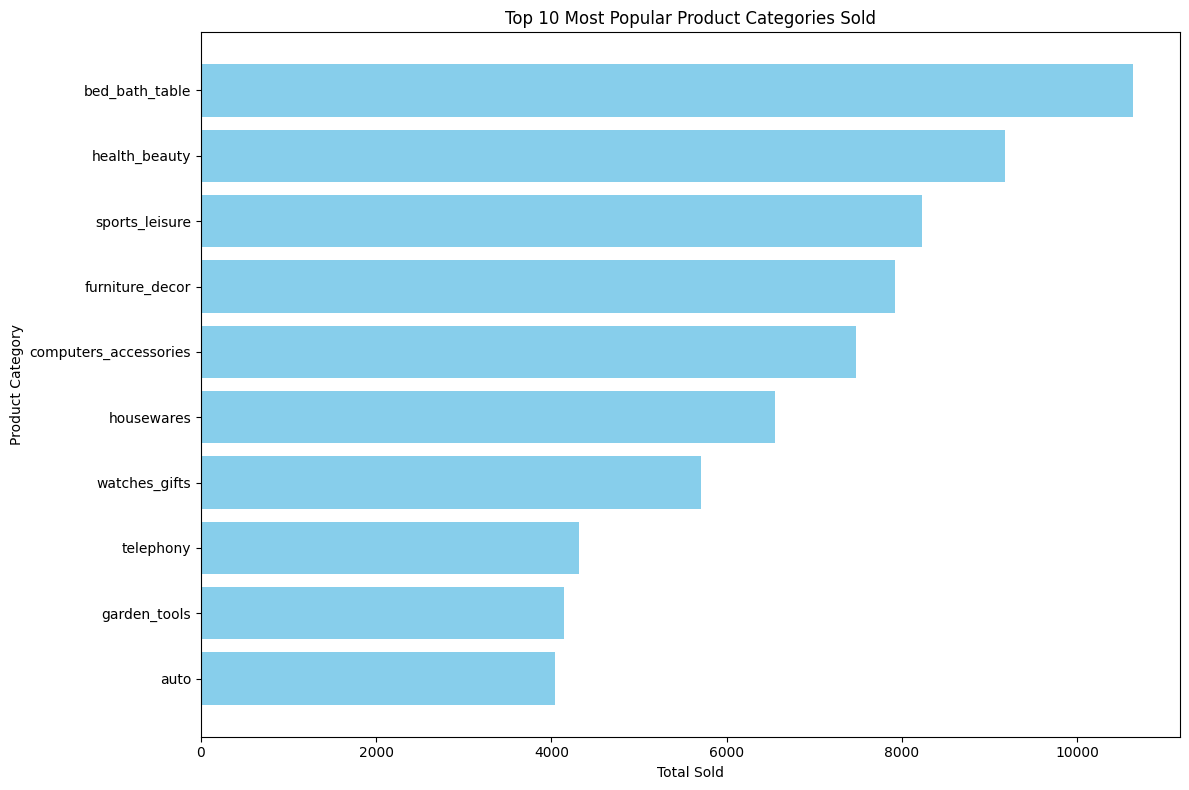

In [28]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt

# Connect to the database
conn = pymysql.connect(host='localhost', user='root', passwd='SQL@123', db='olist', port=3306)

try:
    # Create a cursor object
    cursor = conn.cursor(pymysql.cursors.DictCursor)

    # SQL query to find the top 10 most popular products sold
    sql_query = """
    SELECT 
        cnt.product_category_name_english,
        COUNT(oi.product_id) AS total_sold
    FROM 
        order_items oi
        INNER JOIN products p ON oi.product_id = p.product_id
        INNER JOIN category_name_translation cnt ON p.product_category_name = cnt.product_category_name
    GROUP BY 
        cnt.product_category_name_english
    ORDER BY 
        total_sold DESC
    LIMIT 10;
    """

    # Execute the SQL query
    cursor.execute(sql_query)

    # Fetch all the results
    results = cursor.fetchall()

    # Convert the results to a DataFrame
    df = pd.DataFrame(results)

    # Close cursor and connection
    cursor.close()
    conn.close()

    # Plotting the DataFrame as a bar chart
    plt.figure(figsize=(12, 8))
    plt.barh(df['product_category_name_english'], df['total_sold'], color='skyblue')
    plt.xlabel('Total Sold')
    plt.ylabel('Product Category')
    plt.title('Top 10 Most Popular Product Categories Sold')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest seller at the top
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if conn.open:
        conn.close()


Top Product Categories by Total Sales Value

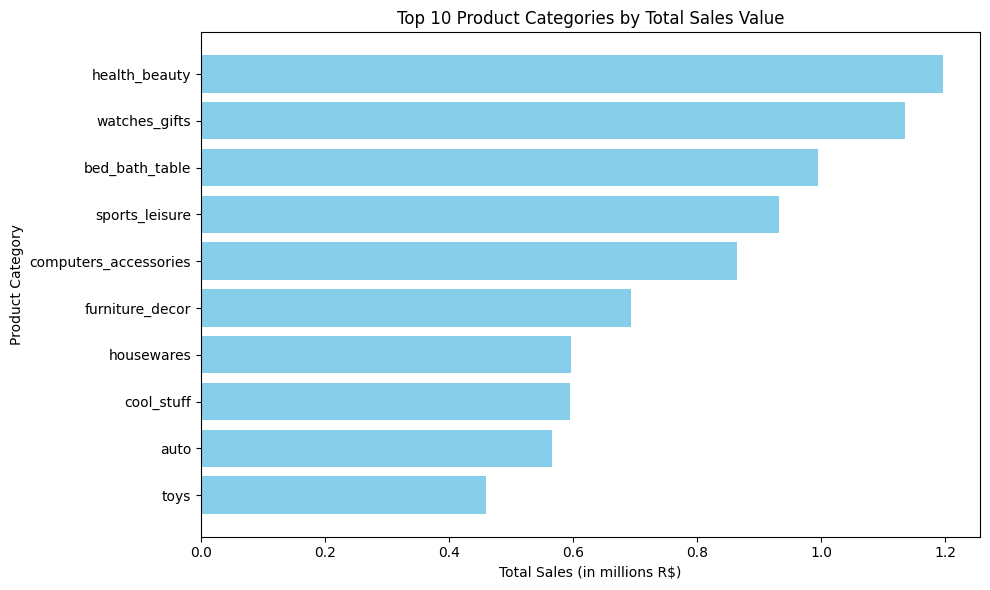

In [30]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt

# Database connection parameters
host = 'localhost'
user = 'root'
password = 'SQL@123'
database = 'olist'
port = 3306

# Connect to the database
conn = pymysql.connect(host=host, user=user, passwd=password, db=database, port=port)

try:
    # Create a cursor object
    cursor = conn.cursor()

    # SQL query to select the top 10 product categories by total sales value
    sql_query = """
    SELECT 
        pc.product_category_name_english,
        SUM(oi.price) AS total_sales_value
    FROM order_items oi
    INNER JOIN orders o ON oi.order_id = o.order_id
    INNER JOIN products p ON oi.product_id = p.product_id
    INNER JOIN category_name_translation pc ON p.product_category_name = pc.product_category_name
    WHERE o.order_status <> 'canceled'
    GROUP BY pc.product_category_name_english
    ORDER BY total_sales_value DESC
    LIMIT 10;
    """

    # Execute the SQL query
    cursor.execute(sql_query)

    # Fetch all the results
    results = cursor.fetchall()
    
    # Convert the results to a DataFrame
    df = pd.DataFrame(results, columns=['ProductCategory', 'TotalSalesValue'])

    # Close cursor and connection
    cursor.close()
    conn.close()

    # Convert the 'TotalSalesValue' from Decimal to float and divide by 1e6
    df['TotalSalesValueMillion'] = df['TotalSalesValue'].astype(float) / 1e6

    # Plotting the DataFrame
    plt.figure(figsize=(10, 6))
    plt.barh(df['ProductCategory'], df['TotalSalesValueMillion'], color='skyblue')
    plt.xlabel('Total Sales (in millions R$)')
    plt.ylabel('Product Category')
    plt.title('Top 10 Product Categories by Total Sales Value')
    plt.gca().invert_yaxis()  # Highest value at top
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
    if conn.open:
        conn.rollback()
        conn.close()


Frequency of Payment Types Used by Customers

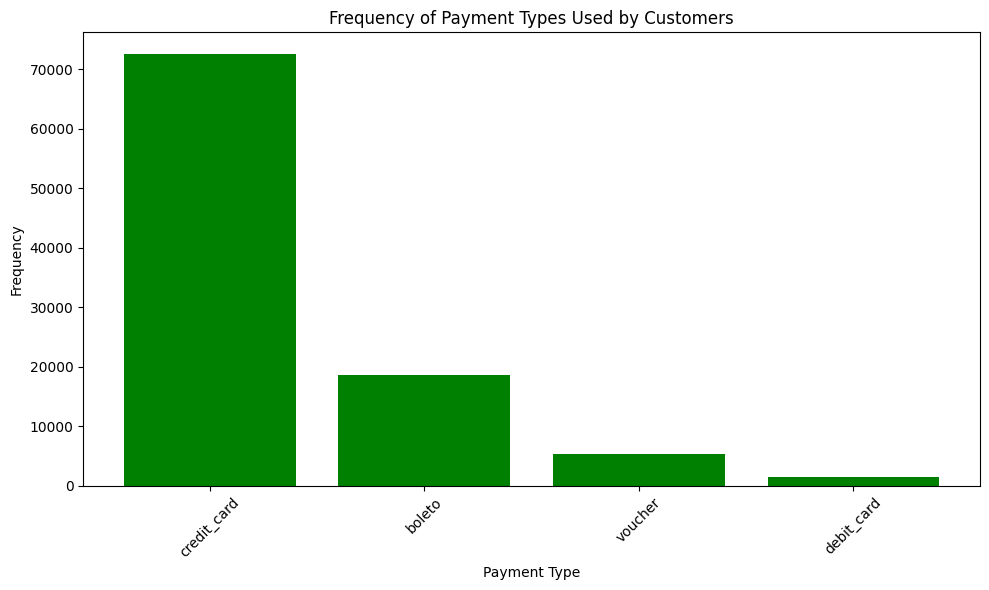

In [31]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt

# Database connection parameters
host = 'localhost'
user = 'root'
password = 'SQL@123'
database = 'olist'
port = 3306

# Connect to the database
conn = pymysql.connect(host=host, user=user, passwd=password, db=database, port=port)

try:
    # Create a cursor object
    cursor = conn.cursor()

    # SQL query to count the frequency of each payment type
    sql_query = """
    SELECT 
        payment_type,
        COUNT(*) AS frequency
    FROM order_payments
    GROUP BY payment_type
    ORDER BY frequency DESC;
    """

    # Execute the SQL query
    cursor.execute(sql_query)

    # Fetch all the results
    results = cursor.fetchall()
    
    # Convert the results to a DataFrame
    df = pd.DataFrame(results, columns=['PaymentType', 'Frequency'])

    # Close cursor and connection
    cursor.close()
    conn.close()

    # Plotting the DataFrame
    plt.figure(figsize=(10, 6))
    plt.bar(df['PaymentType'], df['Frequency'], color='green')
    plt.xlabel('Payment Type')
    plt.ylabel('Frequency')
    plt.title('Frequency of Payment Types Used by Customers')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
    if conn.open:
        conn.rollback()
        conn.close()


Total Revenue

In [32]:
import pymysql

# Database connection parameters
host = 'localhost'
user = 'root'
password = 'SQL@123'
database = 'olist'
port = 3306

# Connect to the database
conn = pymysql.connect(host=host, user=user, passwd=password, db=database, port=port)

try:
    # Create a cursor object
    cursor = conn.cursor()

    # SQL query to calculate the total revenue
    sql_query = """
    SELECT 
        SUM(payment_value) AS total_revenue
    FROM order_payments;
    """

    # Execute the SQL query
    cursor.execute(sql_query)

    # Fetch the result
    result = cursor.fetchone()
    
    # Print the total revenue
    print(f"Total Revenue: R$ {result[0]:,.2f}")

    # Close cursor and connection
    cursor.close()
    conn.close()

except Exception as e:
    print(f"An error occurred: {e}")
    if conn.open:
        conn.rollback()
        conn.close()


Total Revenue: R$ 14,997,543.64


Frequency of Seller Ratings


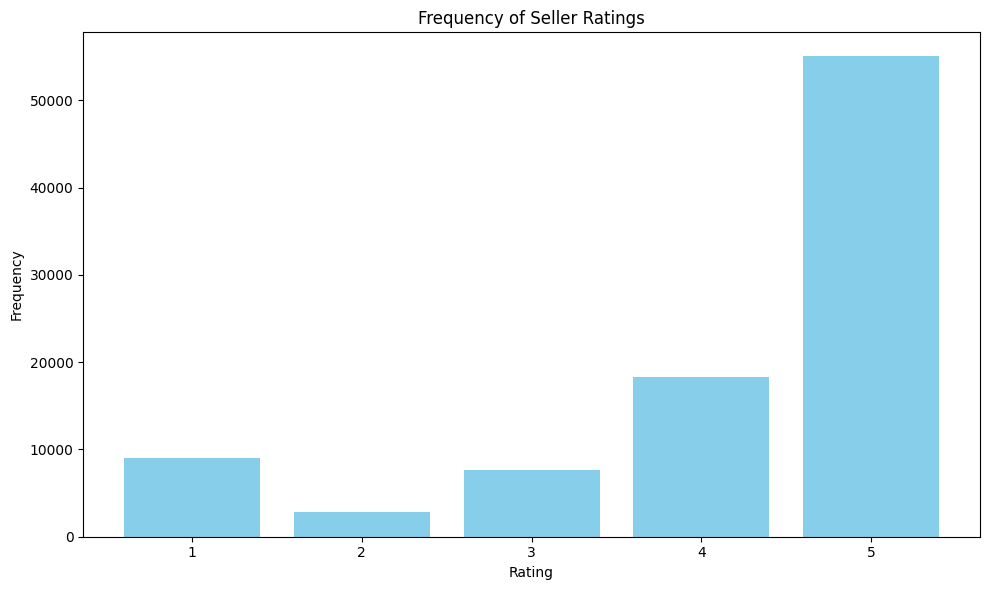

In [35]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt

# Connect to the database
conn = pymysql.connect(host='localhost', user='root', passwd='SQL@123', db='olist', port=3306)

try:
    # Create a cursor object
    cursor = conn.cursor()

    # SQL query to count the frequency of each rating
    sql_query = """
    SELECT review_score, COUNT(*) AS frequency
    FROM order_reviews
    GROUP BY review_score
    ORDER BY review_score;
    """

    # Execute the SQL query
    cursor.execute(sql_query)

    # Fetch all the results
    results = cursor.fetchall()

    # Convert the results to a DataFrame
    df = pd.DataFrame(results, columns=['Rating', 'Frequency'])

    # Close cursor and connection
    cursor.close()
    conn.close()

    # Plotting the DataFrame
    plt.figure(figsize=(10, 6))
    plt.bar(df['Rating'].astype(str), df['Frequency'], color='skyblue')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title('Frequency of Seller Ratings')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
    if conn.open:
        conn.rollback()
        conn.close()


High Rating Sellers

In [36]:
import pandas as pd
import pymysql

# Connect to the database
conn = pymysql.connect(host='localhost', user='root', passwd='SQL@123', db='olist', port=3306)

try:
    # Create a cursor object
    cursor = conn.cursor()

    # SQL query to select sellers from orders with a rating of 5
    sql_query_high = """
    SELECT DISTINCT s.seller_id, s.seller_city, s.seller_state
    FROM sellers s
    JOIN order_items oi ON s.seller_id = oi.seller_id
    JOIN orders o ON oi.order_id = o.order_id
    JOIN order_reviews r ON o.order_id = r.order_id
    WHERE r.review_score = 5;
    """

    # SQL query to select sellers from orders with a rating of 1
    sql_query_low = """
    SELECT DISTINCT s.seller_id, s.seller_city, s.seller_state
    FROM sellers s
    JOIN order_items oi ON s.seller_id = oi.seller_id
    JOIN orders o ON oi.order_id = o.order_id
    JOIN order_reviews r ON o.order_id = r.order_id
    WHERE r.review_score = 1;
    """

    # Fetch high rating sellers
    cursor.execute(sql_query_high)
    high_rating_sellers = cursor.fetchall()
    df_high = pd.DataFrame(high_rating_sellers, columns=['Seller ID', 'City', 'State'])

    # Fetch low rating sellers
    cursor.execute(sql_query_low)
    low_rating_sellers = cursor.fetchall()
    df_low = pd.DataFrame(low_rating_sellers, columns=['Seller ID', 'City', 'State'])

    # Close cursor and connection
    cursor.close()
    conn.close()

    # Print the dataframes
    print("High Rating Sellers:")
    print(df_high)
    print("\nLow Rating Sellers:")
    print(df_low)

except Exception as e:
    print(f"An error occurred: {e}")
    if conn.open:
        conn.rollback()
        conn.close()


High Rating Sellers:
                             Seller ID                   City State
0     4869f7a5dfa277a7dca6462dcf3b52b2                guariba    SP
1     7f35f9daf223da737b78738fbae4d977               valinhos    SP
2     1025f0e2d44d7041d6cf58b6550e0bfa              sao paulo    SP
3     5dceca129747e92ff8ef7a997dc4f8ca  santa barbara d´oeste    SP
4     b2a6d334e2833acea353624840e25a0e              sao paulo    SP
...                                ...                    ...   ...
2595  f8e2c1b59cd4225a3e4fd0d013a76b93         ribeirao preto    SP
2596  9853a239ab7b7ebbdc3a21248d5b8e1f            campo largo    PR
2597  3ef37b7ca6dd2b80bd8af81a62504996              sao paulo    SP
2598  9558aa23f77a9e0a0eca83540999f43b              apucarana    PR
2599  1c83418358f249c9d6affa52d579db0e              sao paulo    SP

[2600 rows x 3 columns]

Low Rating Sellers:
                             Seller ID                 City State
0     2528513dd95219a6013d4d05176e391a             

Delivery Time vs Review Score

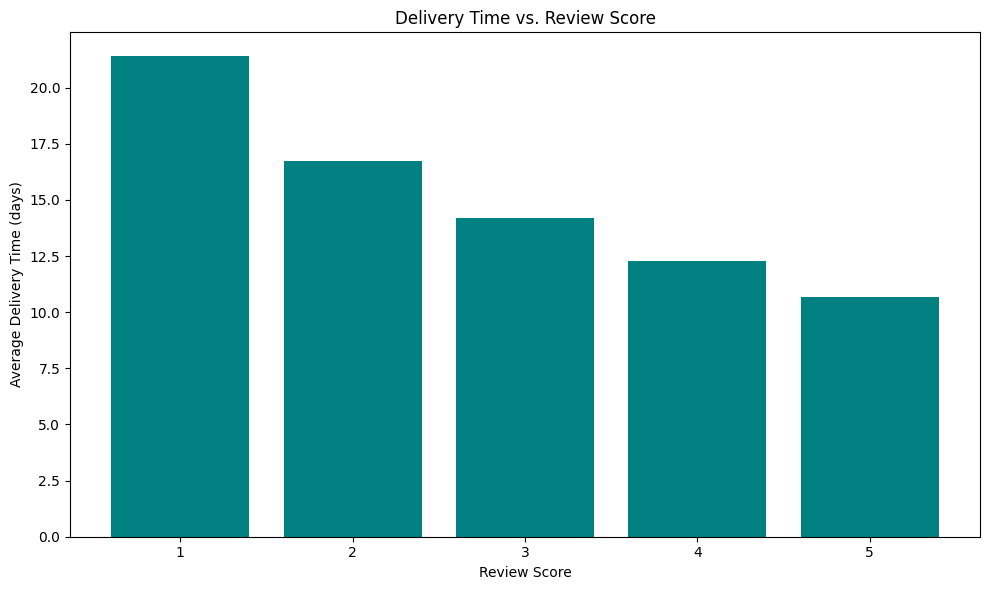

In [37]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt

# Connect to the database
conn = pymysql.connect(host='localhost', user='root', passwd='SQL@123', db='olist', port=3306)

try:
    # Create a cursor object
    cursor = conn.cursor()

    # SQL query to calculate the delivery duration and group by review score
    sql_query = """
    SELECT 
        r.review_score,
        AVG(DATEDIFF(o.order_delivered_customer_date, o.order_purchase_timestamp)) AS avg_delivery_time
    FROM 
        orders o
    JOIN 
        order_reviews r ON o.order_id = r.order_id
    WHERE 
        o.order_delivered_customer_date IS NOT NULL AND
        o.order_status = 'delivered'
    GROUP BY 
        r.review_score
    ORDER BY 
        r.review_score;
    """

    # Execute the SQL query
    cursor.execute(sql_query)

    # Fetch all the results
    results = cursor.fetchall()

    # Close cursor and connection
    cursor.close()
    conn.close()

    # Convert the results to a DataFrame
    df = pd.DataFrame(results, columns=['Review Score', 'Average Delivery Time (days)'])

    # Plotting the DataFrame
    plt.figure(figsize=(10, 6))
    plt.bar(df['Review Score'], df['Average Delivery Time (days)'], color='teal')
    plt.xlabel('Review Score')
    plt.ylabel('Average Delivery Time (days)')
    plt.title('Delivery Time vs. Review Score')
    plt.xticks(df['Review Score'])
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
    if conn.open:
        conn.rollback()
        conn.close()


Correlation Matrix of Product Dimensions, Weight, and Freight Value

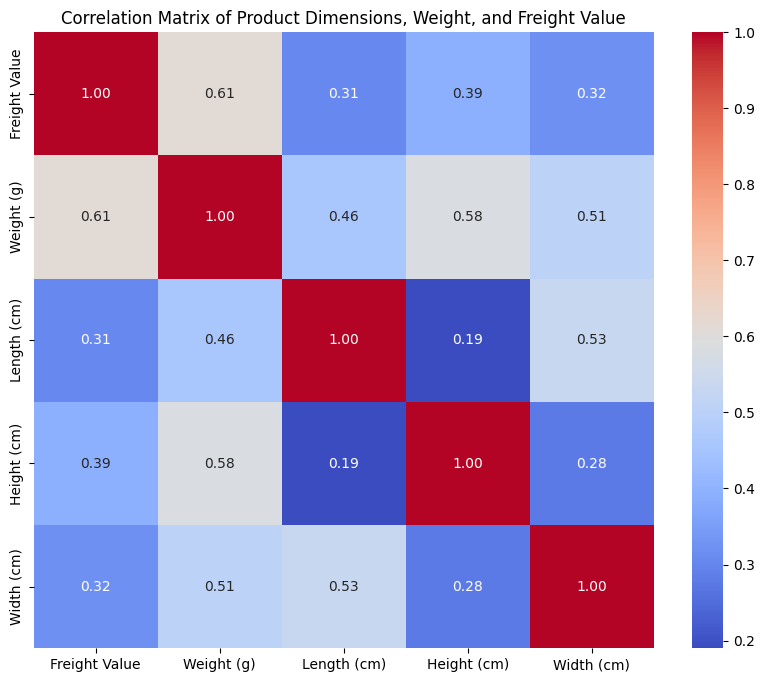

In [39]:
import pandas as pd
import pymysql
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to the database
conn = pymysql.connect(host='localhost', user='root', passwd='SQL@123', db='olist', port=3306)

try:
    # Create a cursor object
    cursor = conn.cursor()

    # Execute the SQL query
    cursor.execute("""
    SELECT
        oi.freight_value,
        p.product_weight_g,
        p.product_length_cm,
        p.product_height_cm,
        p.product_width_cm
    FROM
        order_items oi
    JOIN
        products p ON oi.product_id = p.product_id;
    """)

    # Fetch all the results
    results = cursor.fetchall()

    # Close cursor and connection
    cursor.close()
    conn.close()

    # Convert the results to a DataFrame
    df = pd.DataFrame(results, columns=['Freight Value', 'Weight (g)', 'Length (cm)', 'Height (cm)', 'Width (cm)'])

    # Calculate correlation matrix
    correlation_matrix = df.corr()

    # Plotting the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Product Dimensions, Weight, and Freight Value')
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
    if conn.open:
        conn.rollback()
        conn.close()


Word Cloud of Reviews

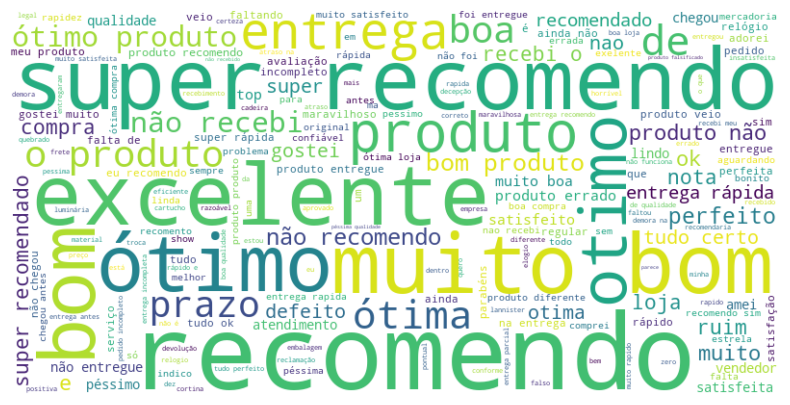

In [47]:
import pandas as pd
import pymysql
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Connect to the database
conn = pymysql.connect(host='localhost', user='root', passwd='SQL@123', db='olist', port=3306)

try:
    # Create a cursor object
    cursor = conn.cursor()

    # Execute the SQL query to fetch processed_titles
    cursor.execute("""
    SELECT processed_titles 
    FROM order_reviews 
    WHERE processed_titles IS NOT NULL;
    """)

    # Fetch all the results
    results = cursor.fetchall()

    # Close cursor and connection
    cursor.close()
    conn.close()

    # Convert the results to a DataFrame
    df = pd.DataFrame(results, columns=['Processed Titles'])

    # Concatenate all the processed titles into a single string and split into words
    all_words = ' '.join(df['Processed Titles']).split()

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

    # Display the generated word cloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
    if conn.open:
        conn.rollback()
        conn.close()

Average Response Time by Month and Day of Week

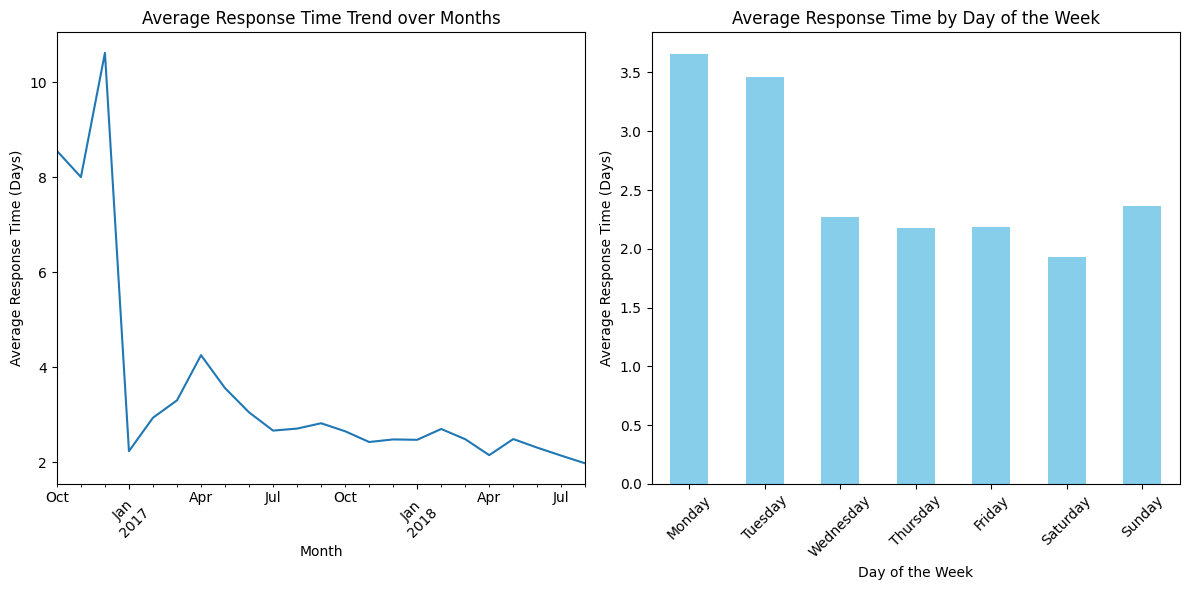

In [49]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Connect to the MySQL database
conn = pymysql.connect(host='localhost', user='root', passwd='SQL@123', db='olist', port=3306)

try:
    # Create a cursor object
    cursor = conn.cursor()

    # Execute the SQL query to fetch necessary columns
    cursor.execute("""
    SELECT review_creation_date, review_answer_timestamp 
    FROM order_reviews;
    """)

    # Fetch all the results
    results = cursor.fetchall()

    # Close cursor and connection
    cursor.close()
    conn.close()

    # Convert the results to a DataFrame
    order_reviews = pd.DataFrame(results, columns=['review_creation_date', 'review_answer_timestamp'])

    # Convert timestamps to datetime if not already done
    order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
    order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])

    # Calculate response time in days
    order_reviews['response_time'] = order_reviews['review_answer_timestamp'] - order_reviews['review_creation_date']
    order_reviews['response_time_days'] = order_reviews['response_time'].dt.days

    # Calculate the average response time trend over months
    response_trend = order_reviews.groupby(order_reviews['review_creation_date'].dt.to_period('M'))['response_time_days'].mean()

    # Calculate the average response time by day of the week
    order_reviews['response_day_of_week'] = order_reviews['review_answer_timestamp'].dt.day_name()
    response_by_weekday = order_reviews.groupby('response_day_of_week')['response_time_days'].mean().reindex([
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

    # Plotting
    plt.figure(figsize=(12, 6))

    # First Subplot - Response Time Trend
    plt.subplot(1, 2, 1)
    response_trend.plot(kind='line', title='Average Response Time Trend over Months')
    plt.xlabel('Month')
    plt.ylabel('Average Response Time (Days)')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Second Subplot - Response Time by Day of Week
    plt.subplot(1, 2, 2)
    response_by_weekday.plot(kind='bar', color='skyblue', title='Average Response Time by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Average Response Time (Days)')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
    if conn.open:
        conn.rollback()
        conn.close()

Order Purchase Trend by Month

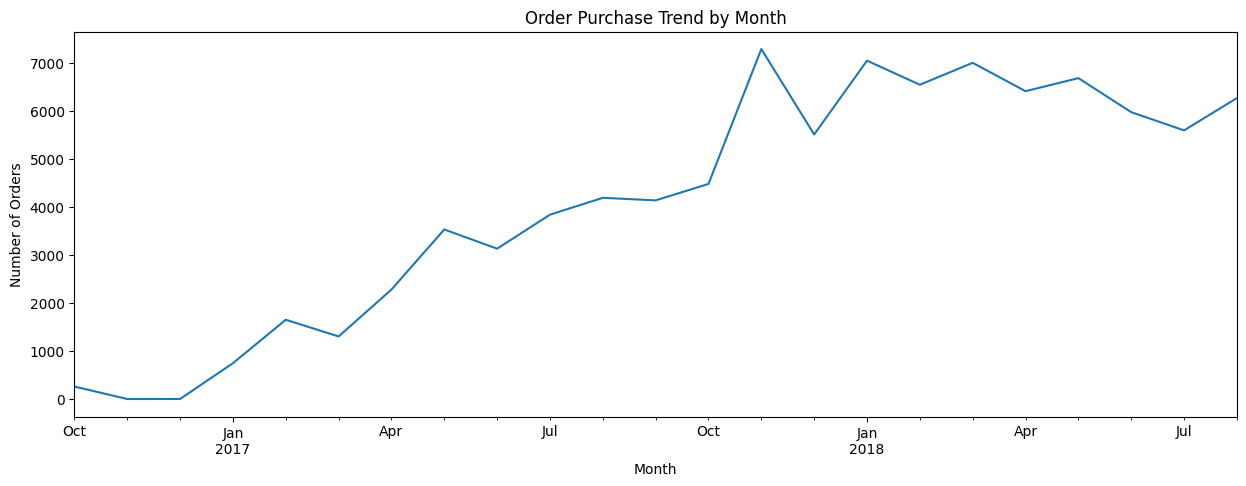

In [51]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the MySQL database
conn = pymysql.connect(host='localhost', user='root', passwd='SQL@123', db='olist', port=3306)

try:
    # Create a cursor object
    cursor = conn.cursor()

    # Execute the SQL query to fetch the order_purchase_timestamp
    cursor.execute("""
    SELECT order_purchase_timestamp 
    FROM orders;
    """)

    # Fetch all the results
    results = cursor.fetchall()

    # Close cursor and connection
    cursor.close()
    conn.close()

    # Convert the results to a DataFrame
    order_dataset = pd.DataFrame(results, columns=['order_purchase_timestamp'])

    # Convert the order_purchase_timestamp column to datetime
    order_dataset['order_purchase_timestamp'] = pd.to_datetime(order_dataset['order_purchase_timestamp'])

    # Set the timestamp column as the index
    order_dataset.set_index('order_purchase_timestamp', inplace=True)

    # Resample the data to find trends, for example, on a monthly basis
    monthly_orders = order_dataset.resample('M').size()

    # Plot the data to visualize trends
    plt.figure(figsize=(15, 5))
    monthly_orders.plot(title='Order Purchase Trend by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Orders')
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
    if conn.open:
        conn.rollback()
        conn.close()

Weekly Carrier Delivery Trend

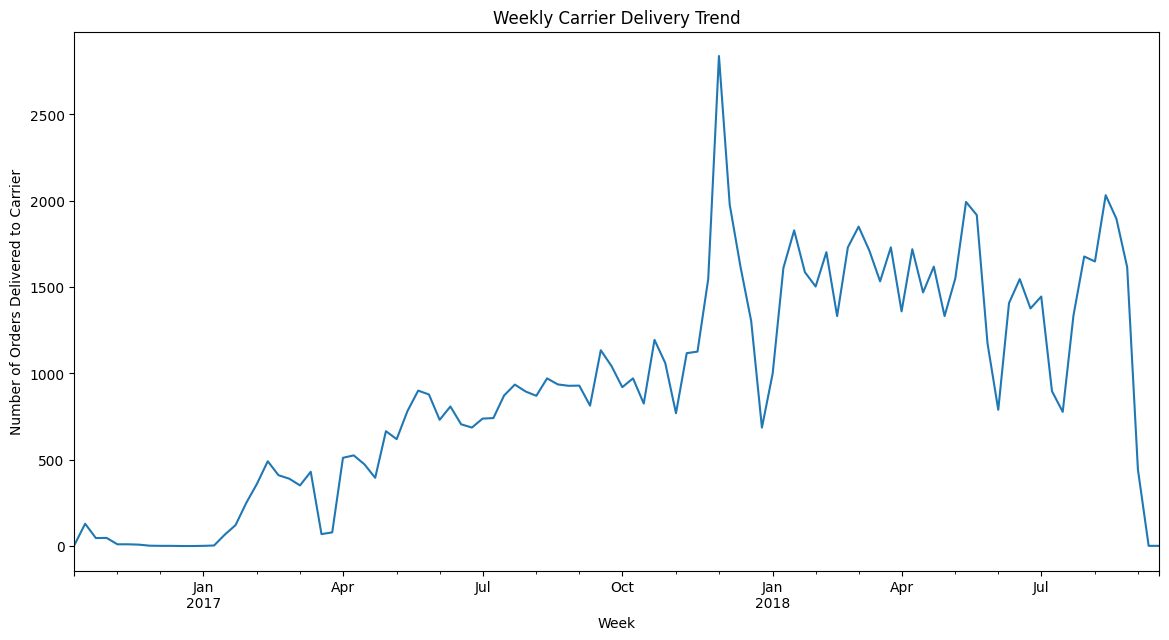

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import pymysql

# Connect to the MySQL database
conn = pymysql.connect(host='localhost', user='root', passwd='SQL@123', db='olist', port=3306)

try:
    # Create a cursor object
    cursor = conn.cursor()

    # Execute the SQL query to fetch the order_delivered_carrier_date
    cursor.execute("""
    SELECT order_delivered_carrier_date 
    FROM orders 
    WHERE order_delivered_carrier_date IS NOT NULL;
    """)

    # Fetch all the results
    results = cursor.fetchall()

    # Close cursor and connection
    cursor.close()
    conn.close()

    # Convert the results to a DataFrame
    order_dataset = pd.DataFrame(results, columns=['order_delivered_carrier_date'])

    # Convert the order_delivered_carrier_date column to datetime
    order_dataset['order_delivered_carrier_date'] = pd.to_datetime(order_dataset['order_delivered_carrier_date'])

    # Set the order_delivered_carrier_date column as the index
    order_dataset.set_index('order_delivered_carrier_date', inplace=True)

    # Resample the data to find trends on a weekly basis
    weekly_deliveries = order_dataset.resample('W').size()

    # Plotting the data to visualize trends
    plt.figure(figsize=(14, 7))
    weekly_deliveries.plot(title='Weekly Carrier Delivery Trend')
    plt.xlabel('Week')
    plt.ylabel('Number of Orders Delivered to Carrier')
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
    if conn.open:
        conn.rollback()
        conn.close()

Order Purchase Date Markdown

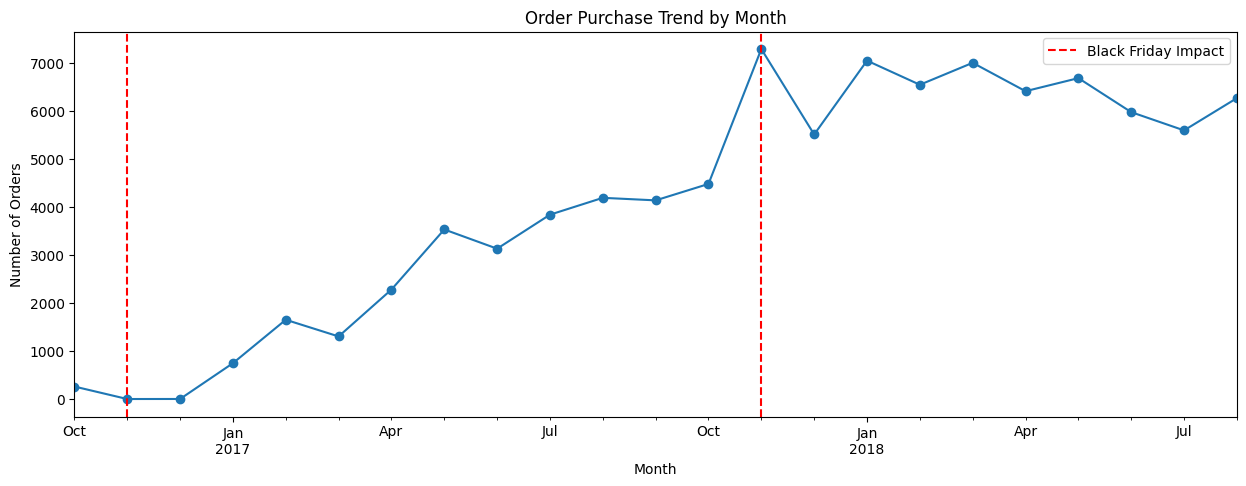

In [55]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the MySQL database
conn = pymysql.connect(host='localhost', user='root', passwd='SQL@123', db='olist', port=3306)

try:
    # Create a cursor object
    cursor = conn.cursor()

    # Execute the SQL query to fetch the order_purchase_timestamp
    cursor.execute("""
    SELECT order_purchase_timestamp 
    FROM orders;
    """)

    # Fetch all the results
    results = cursor.fetchall()

    # Close cursor and connection
    cursor.close()
    conn.close()

    # Convert the results to a DataFrame
    order_dataset = pd.DataFrame(results, columns=['order_purchase_timestamp'])

    # Convert the order_purchase_timestamp column to datetime
    order_dataset['order_purchase_timestamp'] = pd.to_datetime(order_dataset['order_purchase_timestamp'])

    # Set the timestamp column as the index
    order_dataset.set_index('order_purchase_timestamp', inplace=True)

    # Resample the data to find trends, for example, on a monthly basis
    monthly_orders = order_dataset.resample('M').size()

    # Plot the data to visualize trends
    plt.figure(figsize=(15, 5))
    plot = monthly_orders.plot(title='Order Purchase Trend by Month', marker='o')
    plt.xlabel('Month')
    plt.ylabel('Number of Orders')

    # Check if November data exists in the dataset
    novembers = monthly_orders[monthly_orders.index.month == 11]
    if not novembers.empty:
        # Assume Black Friday impacts the whole month's data significantly
        for year in novembers.index.year:
            black_friday_month = pd.Timestamp(year=year, month=11, day=1)
            plt.axvline(x=black_friday_month, color='red', linestyle='--', label='Black Friday Impact' if year == novembers.index.year[0] else "")
    
    plt.legend()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
    if conn.open:
        conn.rollback()
        conn.close()

Histogram of Delivery Accuracy

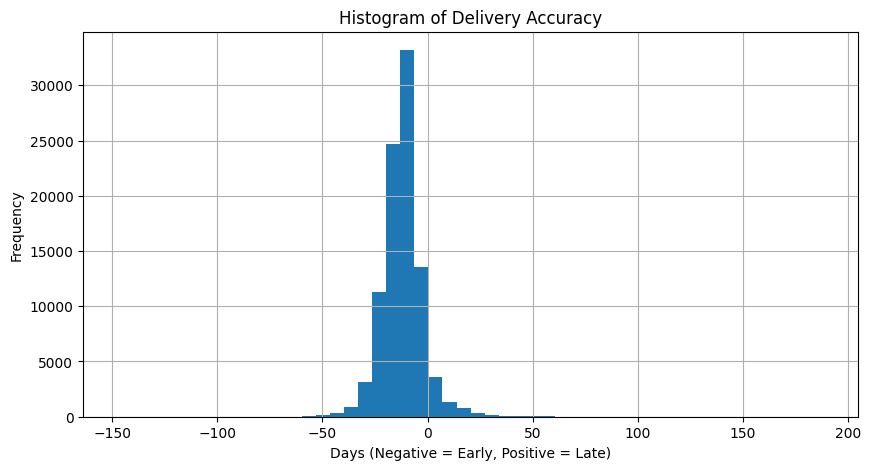

count    93844.00000
mean       -11.82602
std         10.10233
min       -147.00000
25%        -17.00000
50%        -12.00000
75%         -7.00000
max        188.00000
Name: delivery_accuracy, dtype: float64


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import pymysql

# Connect to the MySQL database
conn = pymysql.connect(host='localhost', user='root', passwd='SQL@123', db='olist', port=3306)

try:
    # Create a cursor object
    cursor = conn.cursor()

    # Execute the SQL query to fetch the necessary columns
    cursor.execute("""
    SELECT order_estimated_delivery_date, order_delivered_customer_date 
    FROM orders 
    WHERE order_estimated_delivery_date IS NOT NULL AND order_delivered_customer_date IS NOT NULL;
    """)

    # Fetch all the results
    results = cursor.fetchall()

    # Close cursor and connection
    cursor.close()
    conn.close()

    # Convert the results to a DataFrame
    order_dataset = pd.DataFrame(results, columns=['order_estimated_delivery_date', 'order_delivered_customer_date'])

    # Convert to datetime if necessary
    order_dataset['order_estimated_delivery_date'] = pd.to_datetime(order_dataset['order_estimated_delivery_date'])
    order_dataset['order_delivered_customer_date'] = pd.to_datetime(order_dataset['order_delivered_customer_date'])

    # Calculate the difference in days between estimated and actual delivery
    order_dataset['delivery_accuracy'] = (order_dataset['order_delivered_customer_date'] -
                                          order_dataset['order_estimated_delivery_date']).dt.days

    # Visualize the accuracy of delivery times
    plt.figure(figsize=(10, 5))
    order_dataset['delivery_accuracy'].hist(bins=50)
    plt.title('Histogram of Delivery Accuracy')
    plt.xlabel('Days (Negative = Early, Positive = Late)')
    plt.ylabel('Frequency')
    plt.show()

    # Summary statistics for delivery accuracy
    accuracy_summary = order_dataset['delivery_accuracy'].describe()
    print(accuracy_summary)

except Exception as e:
    print(f"An error occurred: {e}")
    if conn.open:
        conn.rollback()
        conn.close()

Top 5 Product Category Sales Growth Over Time

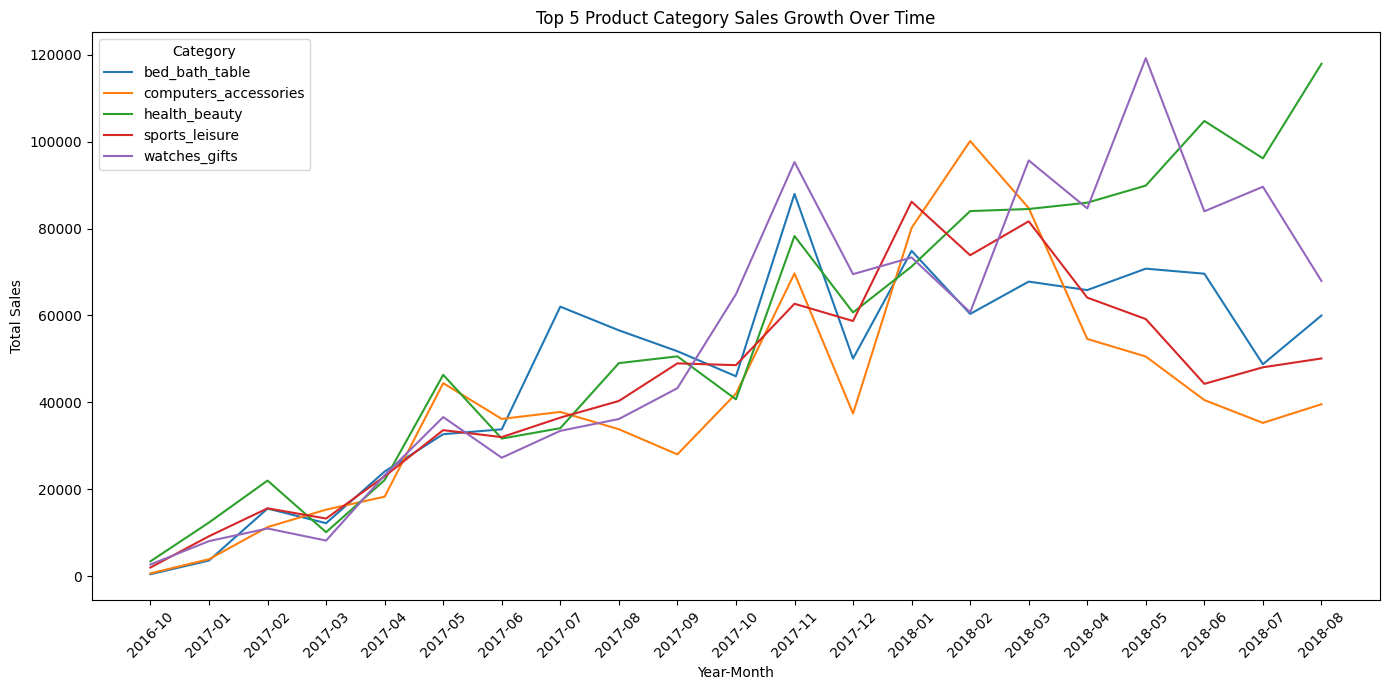

In [66]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt

# Connect to the database
conn = pymysql.connect(host='localhost', user='root', passwd='SQL@123', db='olist', port=3306)

try:
    # Create a cursor object
    cursor = conn.cursor()

    # SQL query to get product category sales growth over time for top 5 categories
    sql_query = """
    SELECT 
        c.product_category_name_english AS Category,
        DATE_FORMAT(o.order_purchase_timestamp, '%Y-%m') AS YearMonth,
        SUM(oi.price) AS TotalSales
    FROM 
        order_items oi
    JOIN 
        orders o ON oi.order_id = o.order_id
    JOIN 
        products p ON oi.product_id = p.product_id
    JOIN 
        category_name_translation c ON p.product_category_name = c.product_category_name
    WHERE 
        o.order_status = 'delivered'
    GROUP BY 
        Category, YearMonth
    HAVING 
        Category IN (
            SELECT 
                Category
            FROM (
                SELECT 
                    c.product_category_name_english AS Category,
                    SUM(oi.price) AS TotalCategorySales
                FROM 
                    order_items oi
                JOIN 
                    orders o ON oi.order_id = o.order_id
                JOIN 
                    products p ON oi.product_id = p.product_id
                JOIN 
                    category_name_translation c ON p.product_category_name = c.product_category_name
                WHERE 
                    o.order_status = 'delivered'
                GROUP BY 
                    Category
                ORDER BY 
                    TotalCategorySales DESC
                LIMIT 5
            ) AS top_categories
        )
    ORDER BY 
        YearMonth, TotalSales DESC;
    """
    
    # Execute the SQL query
    cursor.execute(sql_query)

    # Fetch all the results
    results = cursor.fetchall()

    # Convert the results to a DataFrame
    df = pd.DataFrame(results, columns=['Category', 'YearMonth', 'TotalSales'])

    # Close cursor and connection
    cursor.close()
    conn.close()

    # Pivot the DataFrame for visualization
    df_pivot = df.pivot_table(index='YearMonth', columns='Category', values='TotalSales', fill_value=0)

    # Plotting
    plt.figure(figsize=(14, 7))
    for category in df_pivot.columns:
        plt.plot(df_pivot.index, df_pivot[category], label=category)

    plt.title('Top 5 Product Category Sales Growth Over Time')
    plt.xlabel('Year-Month')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.legend(title='Category', loc='upper left')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
    if conn.open:
        conn.rollback()
        conn.close()


Number of Reviews Over Time

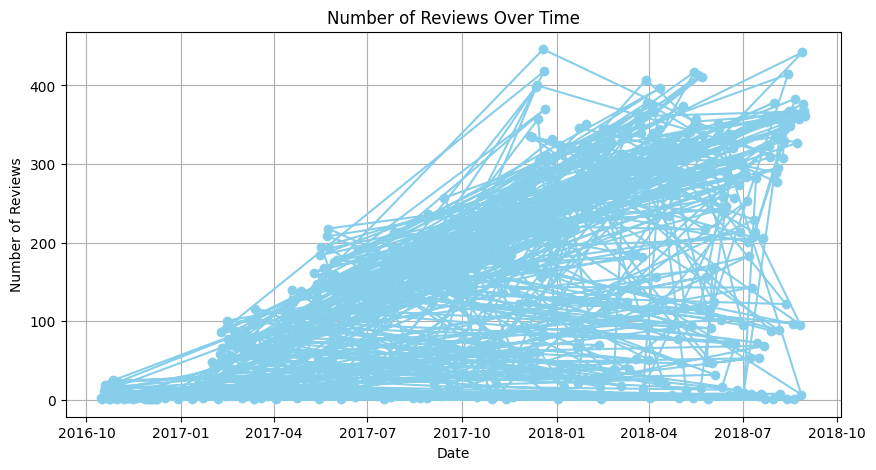

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import pymysql

# Connect to the MySQL database
conn = pymysql.connect(host='localhost', user='root', passwd='SQL@123', db='olist', port=3306)

try:
    # Create a cursor object
    cursor = conn.cursor()

    # Execute the SQL query to fetch the number of reviews by creation date
    cursor.execute("""
    SELECT DATE(review_creation_date) AS review_date, COUNT(*) AS num_reviews
    FROM order_reviews
    GROUP BY review_date;
    """)

    # Fetch all the results
    results = cursor.fetchall()

    # Close cursor and connection
    cursor.close()
    conn.close()

    # Convert the results to a DataFrame
    reviews_over_time_df = pd.DataFrame(results, columns=['review_date', 'num_reviews'])

    # Convert review_date to datetime
    reviews_over_time_df['review_date'] = pd.to_datetime(reviews_over_time_df['review_date'])

    # Visualize the number of reviews over time
    plt.figure(figsize=(10, 5))
    plt.plot(reviews_over_time_df['review_date'], reviews_over_time_df['num_reviews'], marker='o', color='skyblue')
    plt.title('Number of Reviews Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Reviews')
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
    if conn.open:
        conn.rollback()
        conn.close()


Total Revenue Generated by Sellers in Each State

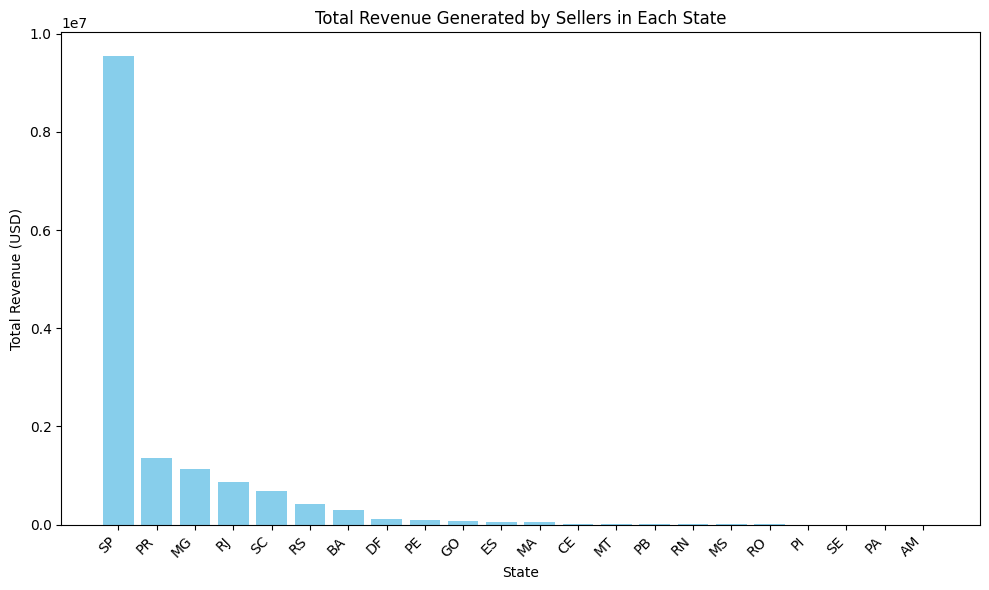

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import pymysql

# Connect to the MySQL database
conn = pymysql.connect(host='localhost', user='root', passwd='SQL@123', db='olist', port=3306)

try:
    # Create a cursor object
    cursor = conn.cursor()

    # Execute the SQL query to fetch the revenue generated by sellers in each state
    cursor.execute("""
    SELECT s.seller_state, SUM(oi.price + oi.freight_value) AS total_revenue
    FROM sellers s
    JOIN order_items oi ON s.seller_id = oi.seller_id
    GROUP BY s.seller_state
    ORDER BY total_revenue DESC;
    """)

    # Fetch all the results
    results = cursor.fetchall()

    # Close cursor and connection
    cursor.close()
    conn.close()

    # Convert the results to a DataFrame
    revenue_by_state_df = pd.DataFrame(results, columns=['State', 'Total Revenue'])

    # Visualize the states where sellers generate the most revenue
    plt.figure(figsize=(10, 6))
    plt.bar(revenue_by_state_df['State'], revenue_by_state_df['Total Revenue'], color='skyblue')
    plt.title('Total Revenue Generated by Sellers in Each State')
    plt.xlabel('State')
    plt.ylabel('Total Revenue (USD)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
    if conn.open:
        conn.rollback()
        conn.close()
